<a href="https://colab.research.google.com/github/kaigitt/GoogleColab/blob/master/%E3%80%90%E7%A0%82%E5%B7%9D%E5%BF%AB%E6%96%97%E3%80%91%E6%95%99%E5%B8%AB%E3%81%82%E3%82%8A%E5%AD%A6%E7%BF%92%E3%81%AE%E6%BC%94%E7%BF%92_editor_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 教師あり学習の演習

## 0. 事前準備

### 0.1 環境構築

まずは次のセルを実行してください。

In [1]:
# こちらのセルを実行してください。
!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 5.1 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=8b5f510e7b96643f2d249c37cdf5c57a53d85a86f7efa745010fb61e953d4aa2
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 3.0.9
    Uninstalling openpyxl-3.0.9:
      Successfully uninstalled openpyxl-3.0.9


実行が完了したら、左上のメニューバーから「ランタイム」 $\rightarrow$ 「ランタイムを再起動」を押してください。

ランタイムの再起動が終わったら、次のセルを実行してください。

In [31]:
# こちらのセルを実行してください。
import pandas as pd
import seaborn as sns

今回使用するデータをダウンロードします。

次のセルを実行してください。

In [3]:
!wget "https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx" -O 'cycle_training.xlsx'

--2022-03-22 13:47:14--  https://us.v-cdn.net/6032257/uploads/jive_attachments/6/3/1/63186354tnemhcatta.xlsx
Resolving us.v-cdn.net (us.v-cdn.net)... 104.18.194.13, 104.18.193.13, 2606:4700::6812:c20d, ...
Connecting to us.v-cdn.net (us.v-cdn.net)|104.18.194.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62467 (61K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘cycle_training.xlsx’

cycle_training.xlsx 100%[===================>]  61.00K  --.-KB/s    in 0.01s   

2022-03-22 13:47:15 (5.98 MB/s) - ‘cycle_training.xlsx’ saved [62467/62467]



これで、ダウンロードできました。次のセルを実行して、データフレームとして読み込みましょう。

In [ ]:
df_cycle = pd.read_excel('cycle_training.xlsx')
df_cycle

これでデータのダウンロードができました。

### 0.2 データ・演習についての説明

今回は天気や日時に関するデータから、レンタサイクルのレンタル数(df_cycleの'count'列)について予測するモデルを作っていただきます。

各列の意味は次のようになっています。
- Instant: 日時固有のID
- Season: 季節	
- year: 年
- dteday: 年月日
- mnth: 月
- holiday: 祝日か否か
- weekday: 曜日
- WorkingDay: 営業日か否か
- weathersit: 天候
- temp: 気温
- atemp: 体感気温
- hum: 湿度
- windspeed: 風速
- count: レンタル数



これらを用いて2011年のデータを学習させ、2012年のcountを予測するモデルを作成してください。

*タイタニックデータと同様に、まずはデータの確認及び可視化を行って、データの外観を理解した上で必要な前処理を実施してください。
その上で適切なモデルを作成し、精度評価を実行するという流れで行ってください。

(こちらはは自由記述課題になります。)

#データの確認

In [ ]:
#レコード数確認
len(df_cycle)

In [ ]:
#カラム数確認
len(df_cycle.columns)

In [20]:
df_cycle.head()

,Instant,Season,year,dteday,mnth,holiday,weekday,WorkingDay,weathersit,temp,atemp,hum,windspeed,count
0,ID-1,Spring,2011,2011-01-01,1,No,6,No,Cloudy,0.344167,0.363625,0.805833,0.160446,985
1,ID-2,Spring,2011,2011-01-02,1,No,0,No,Cloudy,0.363478,0.353739,0.696087,0.248539,801
2,ID-3,Spring,2011,2011-01-03,1,No,1,Yes,Clear,0.196364,0.189405,0.437273,0.248309,1349
3,ID-4,Spring,2011,2011-01-04,1,No,2,Yes,Clear,0.200000,0.212122,0.590435,0.160296,1562
4,ID-5,Spring,2011,2011-01-05,1,No,3,Yes,Clear,0.226957,0.229270,0.436957,0.186900,1600


In [ ]:
#データ型確認
df_cycle.dtypes

In [ ]:
#各カラムの統計量算出
df_cycle.describe().round(3)

#データ加工

In [ ]:
#数値データのみ維持
df_cycle_except_object = df_cycle[['year', 'mnth', 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'count']].copy()
df_cycle_except_object

In [ ]:
#欠損値確認
df_cycle_except_object.isna().sum()

#データの可視化により関連性調査

In [30]:
#各変数間の相関係数確認
df_cycle_except_object.corr()

,year,mnth,weekday,temp,atemp,hum,windspeed,count
year,1.000000,-0.452695,-0.010314,-0.115876,-0.110701,-0.169970,0.096382,0.443076
mnth,-0.452695,1.000000,0.015301,0.371502,0.378604,0.254620,-0.225781,0.174178
weekday,-0.010314,0.015301,1.000000,-0.014238,-0.014323,-0.033017,0.003080,0.046945
temp,-0.115876,0.371502,-0.014238,1.000000,0.996399,0.176356,-0.131793,0.632053
atemp,-0.110701,0.378604,-0.014323,0.996399,1.000000,0.186222,-0.156274,0.641070
hum,-0.169970,0.254620,-0.033017,0.176356,0.186222,1.000000,-0.270100,-0.104621
windspeed,0.096382,-0.225781,0.003080,-0.131793,-0.156274,-0.270100,1.000000,-0.182528
count,0.443076,0.174178,0.046945,0.632053,0.641070,-0.104621,-0.182528,1.000000


countとの相関係数が多い
 weekday,temp,atemp

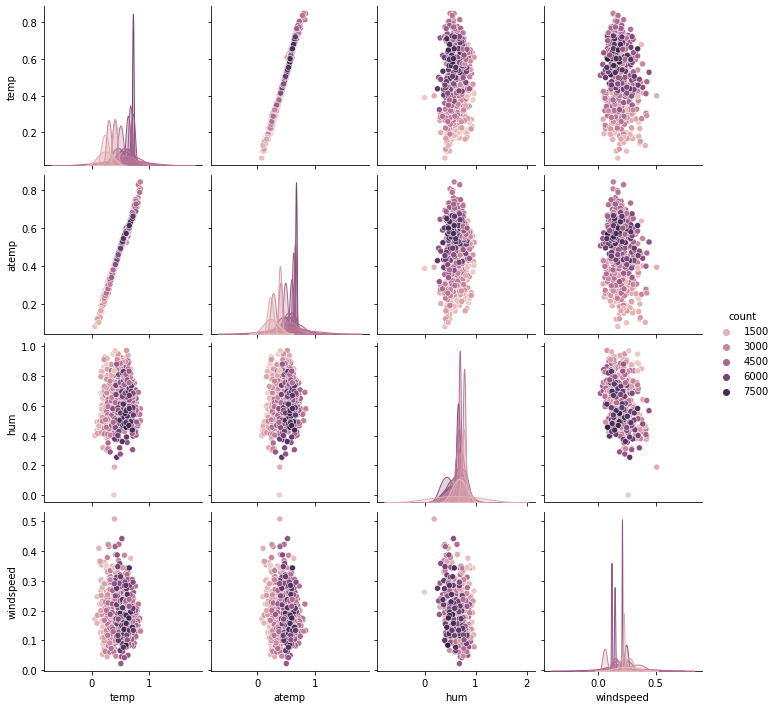

In [36]:
df_cycle_for_pairplot = df_cycle_except_object[['temp', 'atemp', 'hum', 'windspeed', 'count']]
sns.pairplot(data=df_cycle_for_pairplot, hue='count')